In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.utils import to_categorical   #for the categorical data

In [ ]:
print(keras.__version__)

3.10.0


In [ ]:
#import the dataset #x: Images and Y: labels of the images
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


9


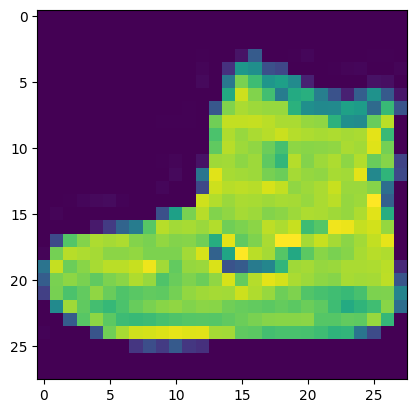

In [ ]:
plt.imshow(train_X[0])
print(train_Y[0])

In [ ]:
print(train_X.shape,train_Y.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_X.shape, test_Y.shape)

(10000, 28, 28) (10000,)


In [ ]:
classes=np.unique(train_Y)
nClasses=len(classes)
print(classes)
print(nClasses)

[0 1 2 3 4 5 6 7 8 9]
10


In [ ]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

In [ ]:
print(train_X.shape,train_Y.shape)
print(test_X.shape, test_Y.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
#Range of pixel values for each type of image
#Black-White: 0-1
#Grayscale: 0-255
#RGB: (0-255)*3

In [ ]:
#converting the values of the pixels from 0-1
#type-conversion
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255

In [ ]:
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

In [ ]:
train_Y[0]

np.uint8(9)

In [ ]:
train_Y_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
#Model training task

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
#Basic CNN model Develop
#Regularization and Dropout
#2nd CNN MODEL DEVELOPMENT

In [ ]:
batch_size=64
epochs=20
num_classes=10

In [ ]:
model=tf.keras.Sequential()

In [ ]:
#1st hidden layer
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
#2nd hidden layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [ ]:
#3rd hidden layer
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(128,activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
48000/64

750.0

In [ ]:
model_train=model.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))

In [ ]:
testing_evaluation=model.evaluate(test_X,test_Y_one_hot)

313/313 [==============================] - 5s 17ms/step - loss: 0.4913 - accuracy: 0.9161


In [ ]:
testing_evaluation  #loss,accuracy

[0.4913441836833954, 0.916100025177002]

In [ ]:
model_train.history

In [ ]:
accuracy=model_train.history['accuracy']
val_accuracy=model_train.history['val_accuracy']
loss=model_train.history['loss']
val_loss=model_train.history['val_loss']
epochs=range(len(accuracy))

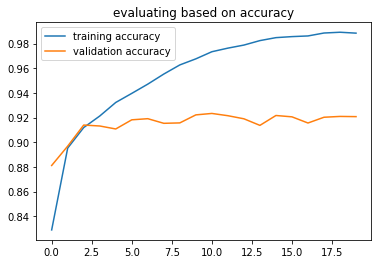

In [ ]:
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('evaluating based on accuracy')
plt.legend()
plt.show()

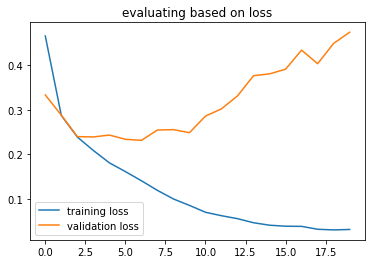

In [ ]:
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.title('evaluating based on loss')
plt.legend()
plt.show()

Regularization

In [ ]:
regmodel=tf.keras.Sequential()
#1st hidden layer
regmodel.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#2nd hidden layer
regmodel.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#3rd hidden layer
regmodel.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.40))
regmodel.add(tf.keras.layers.Flatten())
regmodel.add(tf.keras.layers.Dense(128,activation='linear'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.Dropout(0.3))
regmodel.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [ ]:
regmodel.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
reg_model_train=regmodel.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))